<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/26680/logos/header.png?t=2021-04-23-22-04-05)" />

# Prologue
זאת בעיה מה זה מעניינת וגם חשובה נורא, התחרות מאתגרת ביותר וזו גם הזדמנות לקחת חלק פעיל ומעמיק בתחרות בקאגל והקהילה בקאגל בלה בלה בלה


# Project Description

## Overview
Here in Israel, it can be said that the Coronavirus is over. After an amazing vaccine campaign, and after over 5 million get vaccinated in a very short period of time, the pandemic is almost completely stopped.  
But all over the world, the pandemic is still spreading. As of today, they are 14M active cases over the world and about 500K daily case in average. All world governments manage their own race against the virus and their own vaccine campaigns, but the virus is still faster. So the effort to slow down the disease spreading is now of most important.  
As we all learned in the last year, one of the key tools in this context is the early detection of infections and on a large scale. 
The main tool used for now is PCR tests. But these tests have their own disadvantages - their costs make it difficult to apply them at a large scale, and they have a lower bound on the results time, so it seems to be a good idea to search for additional tools for infection detection.  

It's well known that the COVID19 causes breathing problems many times.
But this phenomenon can also serve us - if the virus causes had such a strong influence on the lungs, we can try to detect the infection by examining the lungs. In this project, we try to develop a way to use chest radiographs (CXR) for determining COVID19 infection. If we succeed, it could be a fast tool to early determine COVID19 infection and could be another stone in the effort to block the virus. 


 ## Compeition Descrition From Kaggle
<div class="competition-markdown"><div class="markdown-converter__text--rendered"><p>Five times more deadly than the flu, COVID-19 causes significant morbidity and mortality. Like other pneumonias, pulmonary infection with COVID-19 results in inflammation and fluid in the lungs. COVID-19 looks very similar to other viral and bacterial pneumonias on chest radiographs, which makes it difficult to diagnose. Your computer vision model to detect and localize COVID-19 would help doctors provide a quick and confident diagnosis. As a result, patients could get the right treatment before the most severe effects of the virus take hold.</p><p><img style="float: right" width="200" src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F603584%2Fd514aaf604bc9667b518b232a77d1aa7%2FCXR%20image1.jpg?generation=1620769201081719&amp;alt=media"></p><p>Currently, COVID-19 can be diagnosed via polymerase chain reaction to detect genetic material from the virus or chest radiograph. However, it can take a few hours and sometimes days before the molecular test results are back. By contrast, chest radiographs can be obtained in minutes. While guidelines exist to help radiologists differentiate COVID-19 from other types of infection, their assessments vary. In addition, non-radiologists could be supported with better localization of the disease, such as with a visual bounding box.</p><p>As the leading healthcare organization in their field, the Society for Imaging Informatics in Medicine (SIIM)'s mission is to advance medical imaging informatics through education, research, and innovation. SIIM has partnered with the Foundation for the Promotion of Health and Biomedical Research of Valencia Region (FISABIO), Medical Imaging Databank of the Valencia Region (BIMCV) and the Radiological Society of North America (RSNA) for this competition.</p><p>In this competition, you’ll identify and localize COVID-19 abnormalities on chest radiographs. In particular, you'll categorize the radiographs as negative for pneumonia or typical, indeterminate, or atypical for COVID-19. You and your model will work with imaging data and annotations from a group of radiologists.</p><p>If successful, you'll help radiologists diagnose the millions of COVID-19 patients more confidently and quickly. This will also enable doctors to see the extent of the disease and help them make decisions regarding treatment. Depending upon severity, affected patients may need hospitalization, admission into an intensive care unit, or supportive therapies like mechanical ventilation. As a result of better diagnosis, more patients will quickly receive the best care for their condition, which could mitigate the most severe effects of the virus.</p><p></div>

## Understanding the challenge
This challenge, as well as the dataset itself, is composed of two levels. the first is the image level which contains the chest radiographs, and above it we have the study level, which contains the general conclusion from all the patient radiographs.
<br>
On the study level, each study is classified by specialists as `Negative for Pneumonia`, or as `Typical Appearance`, `Indeterminate  Appearance`, or `Atypical Appearance` to Covid-19.
The grading system is based on [this paper](https://journals.lww.com/thoracicimaging/Fulltext/2020/11000/Review_of_Chest_Radiograph_Findings_of_COVID_19.4.aspx) which proposes a new reporting language for chest radiographs (CXR) findings related to COVID-19, which is described in the following table (Table 1 in the paper):


> |Radiographic Classification | CXR Findings | Suggested Reporting Language|
|:--------------------------|:-------------|:----------------------------|
|Typical appearance|Multifocal bilateral, peripheral opacities Opacities with rounded morphology Lower lung–predominant distribution|“Findings typical of COVID-19 pneumonia are present. However, these can overlap with other infections, drug reactions, and other causes of acute lung injury”|
Indeterminate appearance | Absence of typical findings AND Unilateral, central or upper lung predominant distribution | “Findings indeterminate for COVID-19 pneumonia and which can occur with a variety of infections and noninfectious conditions” |
Atypical appearance | Pneumothorax or pleural effusion Pulmonary edema Lobar consolidation Solitary lung nodule or mass Diffuse tiny nodules Cavity	|“Findings atypical or uncommonly reported for COVID-19 pneumonia. Consider alternative diagnoses” |
Negative for pneumonia | No lung opacities | “No findings of pneumonia. However, chest radiographic findings can be absent early in the course of COVID-19 pneumonia”|
      
Although those finding refers to the CXR themselves, on this challenge we were provided with those labels only in the study level, while each study can have many images, possibly from different dates related with it.  
On image level, we have for each image a list of bounding boxes of findings in the image. Those bounding box can contain findings from different type, as described by the competition hosts
> Bounding boxes were placed on lung opacities, whether typical or indeterminate. Bounding boxes were also placed on some atypical findings including solitary lobar consolidation, nodules/masses, and cavities. Bounding boxes were not placed on pleural effusions, or pneumothoraces. No bounding boxes were placed for the negative for pneumonia category.

But our dataset doesn't distinguish between the findings type - the findings were given the label `opacity`, and the prediction in the submission for the findings class should be always `opacity`.  
The details of the study grading method according to the findings in the images described in the table above. Even though the exact meaning of the terminology is definitely beyond my understanding, one thing we can learn from this table is that the classifying is based on the nature of findings, as well as on their region in the lungs. This is important for us to know, for a better understanding of what our model is supposed to learn.

## Evalutaion
PASCAL blbblaa bla bal.  
The evaluation on the study level is quite simple: we can simply check our prediction accuracy. But on the image level, our predictions will be bounding boxes. Probably our bounding boxes will not match exactly to the labeled ones, and we do not care if there are minor differences. So how we will decide whether our predictions are consistent with the labels or not?
Come to think of it, the most important thing here is how much our predictions area intersect with the ground truth labels. For ideal prediction, the predicted area will match exactly to the ground truth - i.e, the intersection and the area of each prediction and the ground truth are equals. In a more realistic case, our prediction can be a bit smaller or larger than the ground truth, or span out in one direction and be too short on another. In all these cases, as more as the intersection area is large with respect to both the predicted area and the ground truth label area the more we can regard the prediction as correct. This is the rationale behind the PASCAL VOC2010 IoU (Intersection over Union) evaluation method, which in use in this competition: a bounding box prediction is considered correct if the rate between the intersection between the prediction and the ground truth is and the total area contained in the prediction and the ground truth is greater than $0.5$. i.e, we demand
$$IoU = \frac{A_y \cap A_\hat{y}}{A_y \cup A_\hat{y}} > 0.5$$  
Where $A_y$ is the ground truth bounding box area and $A_\hat{y}$ is the area of the predicted box.

Another thing is the confidence, the most important thing to note here that as well our confidence order represents better the real confidence order between our prediction, we will improve our score. the absolute confidence values are of less importance. 

# Notebook initialize

## Basic Imports

In [1]:
!pip install numpy --upgrade
!pip install python-gdcm

     |████████████████████████████████| 15.3 MB 8.2 MB/s eta 0:00:01    |████████▏                       | 3.9 MB 1.3 MB/s eta 0:00:09
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.3 which is incompatible.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.20.3 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.1 which is incompatible.
matrixprofile 1.1.10 requires protobuf==3.11.2, but you have protobuf 3.15.8 which is incompatible.
autogluon-core 0.1.0 requires numpy==1.19.5, but you have numpy 1.20.3 which is incompatible.
     |████████████████████████████████| 9.4 MB 1.0 MB/s eta 

In [52]:
from pathlib import Path
import sys
from ast import literal_eval

import numpy as np
import pandas as pd

import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seaborn as sns

print(sys.version)

mlp.rcParams['figure.figsize'] = (15, 7)
# sns.set(style="darkgrid")

3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]


## Enviroment Settings

For running this notebook I switched between Kaggle kernels and Google Colab. The main advantage of the kaggle kernels is that the competition data came built-in the kernel, and the disk I\O is relatively fast. On the other hand, Google colab is a much more convenient environment, not to mention the free GPU while on kaggle I have only 30 GPU hours per week. Downloading the dataset from Colab and saving it on a mounted drive doesn't work - the data was too big and crashes the kernel. To be able to work on Google colab, I downloaded all the competition dataset on a local machine with a high upload rate and upload it to Google Drive (what wasn't quite that simple, regarding the limited disk space on the local device, and required writing a dedicated script for unzipping the files and upload them by batches). After that I could mount my drive on Colab kernel and get access to my data - but the I\O performance that way was much worse than on kaggle. The code below is used for the ability to switch between the environments.

In [3]:
is_colab = 'google.colab' in sys.modules
if is_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    path = Path('/content/drive/MyDrive/covid19-detection/data') 
else:
    path = Path('/kaggle/input/siim-covid19-detection') 

# EDA

Our dataset is composed of three parts. We have the CRX files in DICOM format, and two metadata tables: one for the image level and another for the study level.
Let's explore first the image-level metadata of the training set.

In [4]:
image_df = pd.read_csv(path/'train_image_level.csv', index_col='id')

In [5]:
image_df.head()

boxes  \
id                                                                      
000a312787f2_image  [{'x': 789.28836, 'y': 582.43035, 'width': 102...   
000c3a3f293f_image                                                NaN   
0012ff7358bc_image  [{'x': 677.42216, 'y': 197.97662, 'width': 867...   
001398f4ff4f_image  [{'x': 2729, 'y': 2181.33331, 'width': 948.000...   
001bd15d1891_image  [{'x': 623.23328, 'y': 1050, 'width': 714, 'he...   

                                                                label  \
id                                                                      
000a312787f2_image  opacity 1 789.28836 582.43035 1815.94498 2499....   
000c3a3f293f_image                                     none 1 0 0 1 1   
0012ff7358bc_image  opacity 1 677.42216 197.97662 1545.21983 1197....   
001398f4ff4f_image    opacity 1 2729 2181.33331 3677.00012 2785.33331   
001bd15d1891_image  opacity 1 623.23328 1050 1337.23328 2156 opaci...   

                   StudyInstanceUID  
id                                   
000a312787f2_image     5776db0cec75  
000c3a3f293f_image     ff0879eb20ed  
0012ff7358bc_image     9d514ce429a7  
001398f4ff4f_image     28dddc8559b2  
001bd15d1891_image     dfd9fdd85a3e

Before doing anything else, we'd like to change this terrible column name `StudyInstanceUID` to a more reasonable one.

In [6]:
image_df = image_df.rename(columns={'StudyInstanceUID':'study_id'})

Now it's much better.

For each image we are provided with image id, study id, the findings bounding boxes, and labels for each bounding box.
Let's examine first the label column.  

This column content is corresponding to the submission's desired format. It contains a description of an unlimited number of finding, space separated. Each of these descriptions contains 6 fields, also space separated, which are as follows:   
`finding_label confidence xmin ymin xmax ymax  `
So the content of this row is as this pattern, repeated as number of this image's findings. So if we have $k$ finding for specifiec image, the label row will be:  
`finding_label_1 confidence_1 xmin_1 ymin_1 xmax_1 ymax_1 finding_label_2 ...  finding_label_k confidence_k xmin_k ymin_k xmax_k ymax_k `

Let's extract those values.

In [7]:
def extract_label(row):
    values = row.label.split()
    if len(values) % 6 != 0:
        # currpted row
        print(f'row #{row.index}: worng number of paramerers in label field')
    return [dict(zip('id finding_id label confident xmin ymin xmax ymax'.split(), [row.name, i] + values[6*i:6*(i+1)])) for i in range(len(values) // 6)]

In [8]:
findings = pd.DataFrame.from_dict(image_df.apply(extract_label, axis=1).sum()).set_index('id')
findings.head()

finding_id    label confident        xmin       ymin  \
id                                                                         
000a312787f2_image           0  opacity         1   789.28836  582.43035   
000a312787f2_image           1  opacity         1  2245.91208  591.20528   
000c3a3f293f_image           0     none         1           0          0   
0012ff7358bc_image           0  opacity         1   677.42216  197.97662   
0012ff7358bc_image           1  opacity         1  1792.69064   402.5525   

                          xmax        ymax  
id                                          
000a312787f2_image  1815.94498  2499.73327  
000a312787f2_image   3340.5737  2352.75472  
000c3a3f293f_image           1           1  
0012ff7358bc_image  1545.21983  1197.75876  
0012ff7358bc_image  2409.71798   1606.9105

Now we can see the domains of these values

In [9]:
print(f'The unique findings label values are {findings.label.unique()}')

The unique findings label values are ['opacity' 'none']


In [10]:
print(f'The unique findings confdence values are {findings.confident.unique()}')

The unique findings confdence values are ['1']


Ok, so our labels are only `none` and `opacity`, and the confidence in the training set is always 1 (which is not a surprise for a labeled dataset). All bounding box data is provided in the `boxes` field, and that field is `Nan` when there are no findings (as we can see in the second row in the head of the Dataframe printed above), so in fact, all the data we need exist in `boxes` field. So we can extract our findings directly from boxes fields and examine some of their properties.

In [11]:
findings = image_df.apply(lambda x: [{'id':x.name, 'finding_id': i, **box} for i, box in enumerate(literal_eval(x.boxes))] if type(x.boxes) == str else [{'id': x.name}], axis=1)
findings = pd.DataFrame.from_dict(findings.sum()).set_index('id')

In [12]:
print(f'Total number of findings: {findings.shape[0]}')
findings.head()

Total number of findings: 9893


finding_id           x          y       width      height
id                                                                           
000a312787f2_image         0.0   789.28836  582.43035  1026.65662  1917.30292
000a312787f2_image         1.0  2245.91208  591.20528  1094.66162  1761.54944
000c3a3f293f_image         NaN         NaN        NaN         NaN         NaN
0012ff7358bc_image         0.0   677.42216  197.97662   867.79767   999.78214
0012ff7358bc_image         1.0  1792.69064  402.55250   617.02734  1204.35800

Before further exploration of findings properties, let's explore the study-level metadata:

In [13]:
study_df = pd.read_csv(path/'train_study_level.csv', index_col='id')

In [14]:
study_df.head()

Negative for Pneumonia  Typical Appearance  \
id                                                               
00086460a852_study                       0                   1   
000c9c05fd14_study                       0                   0   
00292f8c37bd_study                       1                   0   
005057b3f880_study                       1                   0   
0051d9b12e72_study                       0                   0   

                    Indeterminate Appearance  Atypical Appearance  
id                                                                 
00086460a852_study                         0                    0  
000c9c05fd14_study                         0                    1  
00292f8c37bd_study                         0                    0  
005057b3f880_study                         0                    0  
0051d9b12e72_study                         0                    1

In this dataframe we have a classification for each study to one of 4 classes: `Negative for Pneumonia`, `Typical Appearance`, `Indeterminate Appearance`, and `Atypical Appearance`. It's will be important to know how these classes distributed over the dataset.
In the evaluation section in the competition details in kaggle it's said that 
> Studies in the test set may contain more than one label. They are as follows: `negative`, `typical`, `indeterminate`, `atypical`

According to this declaration, our task here is a multilabel classification task. 
On the other hand, in a post in the competition discussion section, the hosts indicate that
> Per the grading schema, chest radiographs are classified into one of four categories, which are **mutually exclusive**

Which makes much more sense. Therefore, it will be worth inspecting our training to see which labels can be assigned to one image side by side.

In [15]:
(study_df.apply(sum, axis=1) == 1).all()

True

So in our training set, each of the studies has a single label attached to it, and this classification is at fact one-hot encoded classification for each study to one of those 4 classes. Actually, I hardly can see any pair of these 4 classes that can be assigned both to one image.  
So for now, we will leave it as a single-label classification task, and it will be more convient to store the labels in one row rather then in one-hot encoding format, and also to join it with the images dataframe.

In [16]:
image_df.study_id += '_study' 
study_labels = study_df.idxmax(axis=1).rename('study_label')
# study_labels.index = study_labels.index.str.extract('(^[^_]*)').apply(lambda x:x[0], axis=1)
image_df = image_df.merge(study_labels, left_on='study_id', right_index=True)

It's may be important for us to know how these classes distributed over the dataset.

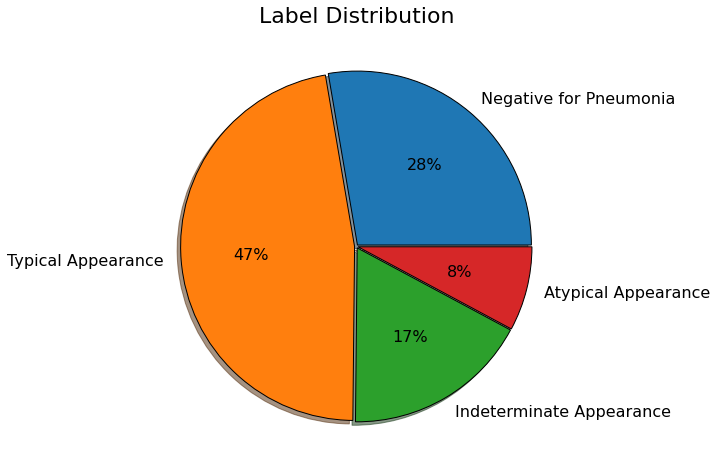

In [17]:
label_count = study_df.sum()
plt.figure(figsize=(8, 8))
plt.pie(label_count, labels=label_count.index, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', textprops={'fontsize': 16}, explode=[.01]*4, shadow=True)
plt.title('Label Distribution', fontdict={'fontsize':22});

We have 47% sure covid cases (typical appearance), 36% non-covid (28% negative for pneumonia and 8% atypical to covid), and 17% obscure cases. from a covid vs non-covid point of view, the dataset is quite balanced. but from the classifying point of view, we have almost 50% from one class and only 8% from another.
It's will be nice to see that data in absolute numbers:

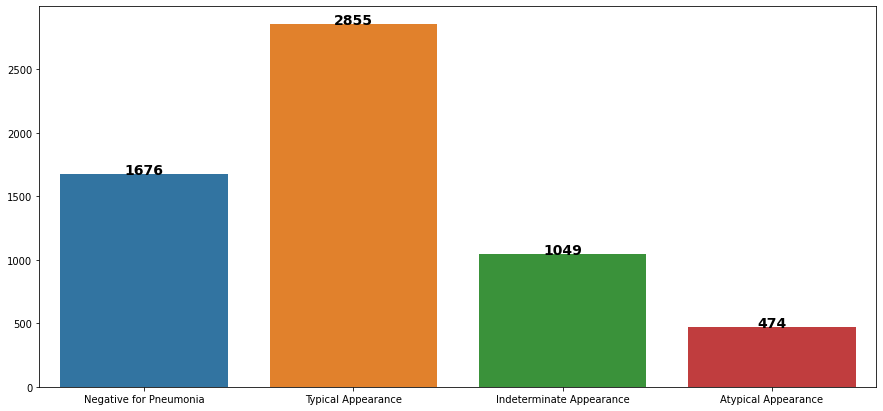

In [18]:
g = sns.barplot(x=label_count.index, y=label_count)
for label, count in zip(range(label_count.index.shape[0]), label_count):
    g.text(label, count, count, color='black', ha="center", fontdict=dict(fontsize=14, weight='bold'))

Now, let's look at some properties of the findings. for each image we have a varying number of findings, each of them is an opacity (or another type of the above-mentioned findings) in the image, and for each of them we provided the bounding box of the opacity area. We'd like to know the number of findings for each image, and the main statistical properties of their areas: sum, mean, max, etc.

In [19]:
findings['area'] = findings.width * findings.height
findings_props = findings.groupby('id').area.agg(['count','sum', 'min', 'max', 'mean', 'std'])

In [22]:
# findings_props.index = findings_props.index.str.extract('(^[^_]*)').apply(lambda x:x[0], axis=1)
image_props = image_df.join(findings_props)
image_props.head()

boxes  \
id                                                                      
000a312787f2_image  [{'x': 789.28836, 'y': 582.43035, 'width': 102...   
000c3a3f293f_image                                                NaN   
0012ff7358bc_image  [{'x': 677.42216, 'y': 197.97662, 'width': 867...   
001398f4ff4f_image  [{'x': 2729, 'y': 2181.33331, 'width': 948.000...   
001bd15d1891_image  [{'x': 623.23328, 'y': 1050, 'width': 714, 'he...   

                                                                label  \
id                                                                      
000a312787f2_image  opacity 1 789.28836 582.43035 1815.94498 2499....   
000c3a3f293f_image                                     none 1 0 0 1 1   
0012ff7358bc_image  opacity 1 677.42216 197.97662 1545.21983 1197....   
001398f4ff4f_image    opacity 1 2729 2181.33331 3677.00012 2785.33331   
001bd15d1891_image  opacity 1 623.23328 1050 1337.23328 2156 opaci...   

                              study_id             study_label  count  \
id                                                                      
000a312787f2_image  5776db0cec75_study      Typical Appearance      2   
000c3a3f293f_image  ff0879eb20ed_study  Negative for Pneumonia      0   
0012ff7358bc_image  9d514ce429a7_study      Typical Appearance      2   
001398f4ff4f_image  28dddc8559b2_study     Atypical Appearance      1   
001bd15d1891_image  dfd9fdd85a3e_study      Typical Appearance      2   

                             sum           min           max          mean  \
id                                                                           
000a312787f2_image  3.896712e+06  1.928301e+06  1.968412e+06  1.948356e+06   
000c3a3f293f_image  0.000000e+00           NaN           NaN           NaN   
0012ff7358bc_image  1.610730e+06  7.431218e+05  8.676086e+05  8.053652e+05   
001398f4ff4f_image  5.725921e+05  5.725921e+05  5.725921e+05  5.725921e+05   
001bd15d1891_image  1.531871e+06  7.421867e+05  7.896840e+05  7.659353e+05   

                             std  
id                                
000a312787f2_image  28362.881484  
000c3a3f293f_image           NaN  
0012ff7358bc_image  88025.459354  
001398f4ff4f_image           NaN  
001bd15d1891_image  33585.683848

First of all we'll plot the findings count for each class label:

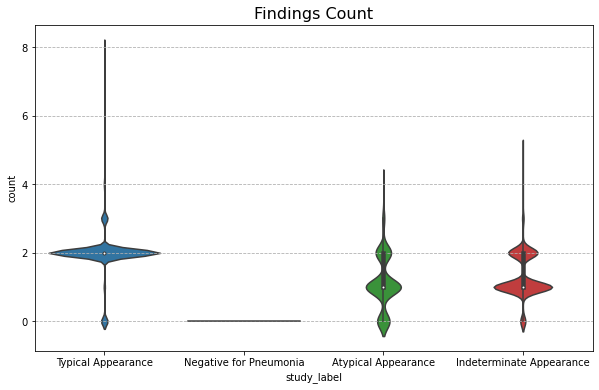

In [23]:
plt.figure(figsize=(10,6))
plt.gca().yaxis.grid(linestyle='--')
sns.violinplot(data=image_props, x='study_label', y='count')
plt.title('Findings Count', fontdict={'fontsize':16})
plt.show()

We can see that all the negatives have no findings at all, as stated in the table from the grading method table. On the other hand, in each of other types it seems that there are instances with no opacity finding, contrary to these grades description in this table. But is that the case? We saw earlier that we have more images than studiedץ That is, some studied have more than one image .So maybe in some cases, the prognosis is based on findings that determined only in one of the scans? let's check it.

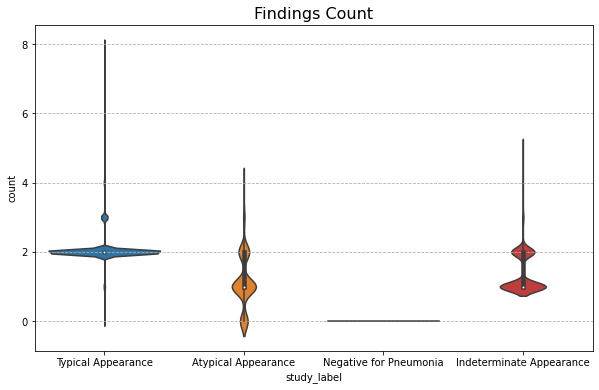

In [24]:
study_findings_props = image_props.groupby(['study_id'])
study_findings_count = study_findings_props['count'].agg('sum').to_frame().join(study_labels)
plt.figure(figsize=(10,6))
plt.gca().yaxis.grid(linestyle='--')
sns.violinplot(data=study_findings_count, x='study_label', y='count')
plt.title('Findings Count', fontdict={'fontsize':16})
plt.show()

Now it's much more clear. Almost all of the clear covid-19 cases have 2 findings, and couple of them with 3 findings. The indeterminate cases also have at least one finding each, and only the non covid cases sometimes have no findings, even when posiztive to pneumonia. But according to our table, `No Findings` means `Posiztive to Pneumonia`, so we'll put those instance aside for now.

In [25]:
studies_to_remove = study_df[study_df.index.isin(study_findings_props['count'].sum()[study_findings_props['count'].sum() == 0].index) & 
         (study_df['Negative for Pneumonia'] == 0)]
study_df['removed'] = False
study_df.loc[studies_to_remove.index, 'removed'] = True
print(f'Total number of removed rows: {study_df.loc[studies_to_remove.index].shape[0]}')
print(f'\n\nRemoved rows by label:\n')
print(study_df.loc[studies_to_remove.index].iloc[:, :-1].sum().to_string())

Total number of removed rows: 84


Removed rows by label:

Negative for Pneumonia       0
Typical Appearance           1
Indeterminate Appearance     0
Atypical Appearance         83


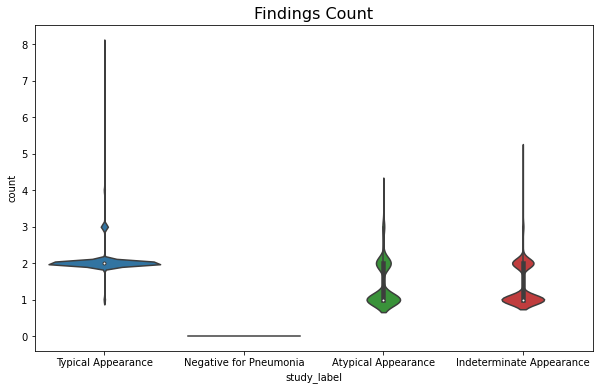

In [26]:
image_props = image_props.drop(image_props.loc[image_props.study_id.isin(studies_to_remove.index)].index)

study_findings_props = image_props.groupby(['study_id'])
study_findings_count = study_findings_props['count'].agg('sum').to_frame().join(study_labels)
plt.figure(figsize=(10,6))
# plt.gca().yaxis.grid(linestyle='--')
sns.violinplot(data=study_findings_count, x='study_label', y='count')
plt.title('Findings Count', fontdict={'fontsize':16})
plt.show()

Now all the positive caes have findings,
Let's inspect other findings properties:

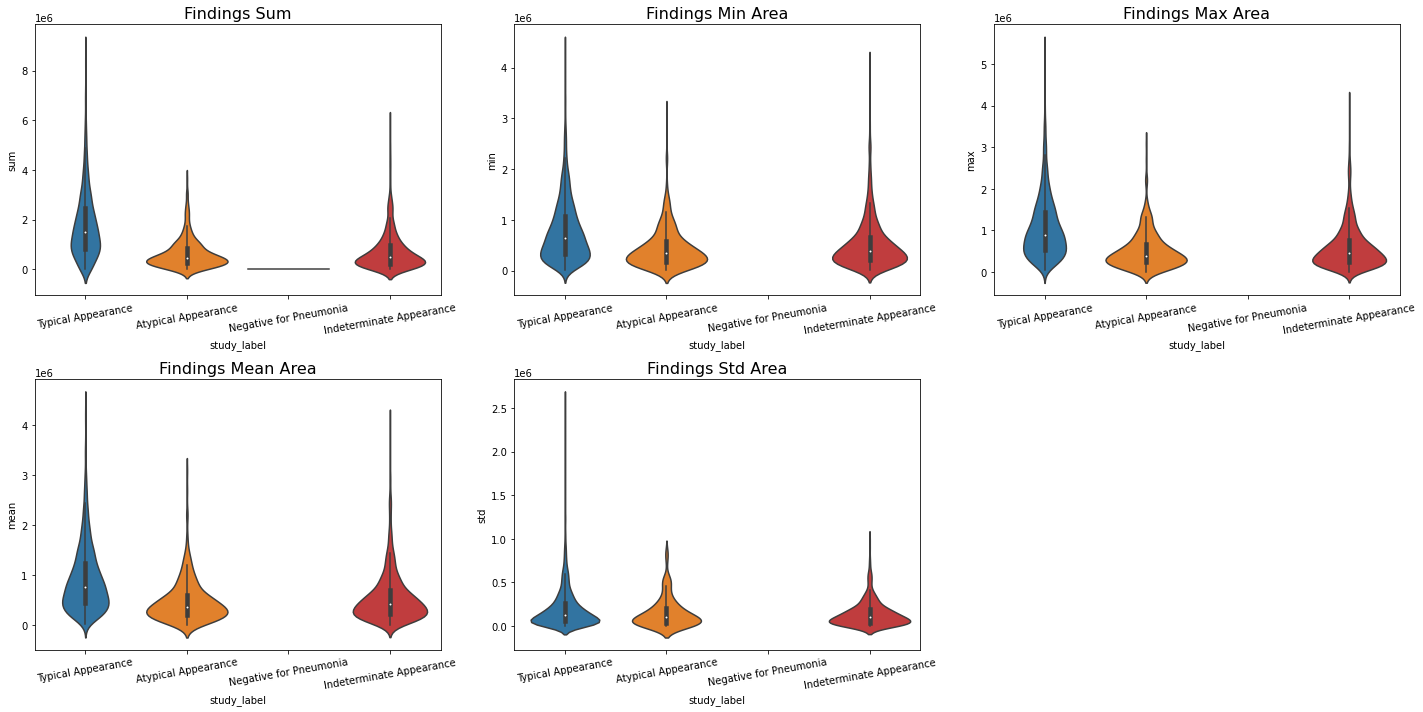

In [27]:
plt.figure(figsize=(20,10))

for i, prop in enumerate(['sum', 'min', 'max', 'mean', 'std'], start=1):
    plt.subplot(2, 3, i)
#     plt.gca().yaxis.grid(linestyle='--')
    sns.violinplot(data=image_props, x='study_label', y=prop, order=study_labels.unique())
    plt.xticks(rotation=10)
    title = f'Findings {prop.title()}'
    if prop.title() != 'Sum': title += ' Area'
    plt.title(title, fontdict={'fontsize':16})
plt.tight_layout()
plt.show()

We can see, that concerning findings areas also the clear covid case strongly tends to be larger. The indeterminate cases also have a weak tend to have larger findings areas than the atypical ones, but this difference is much less significant. Let's inspect here again those features is the study level.

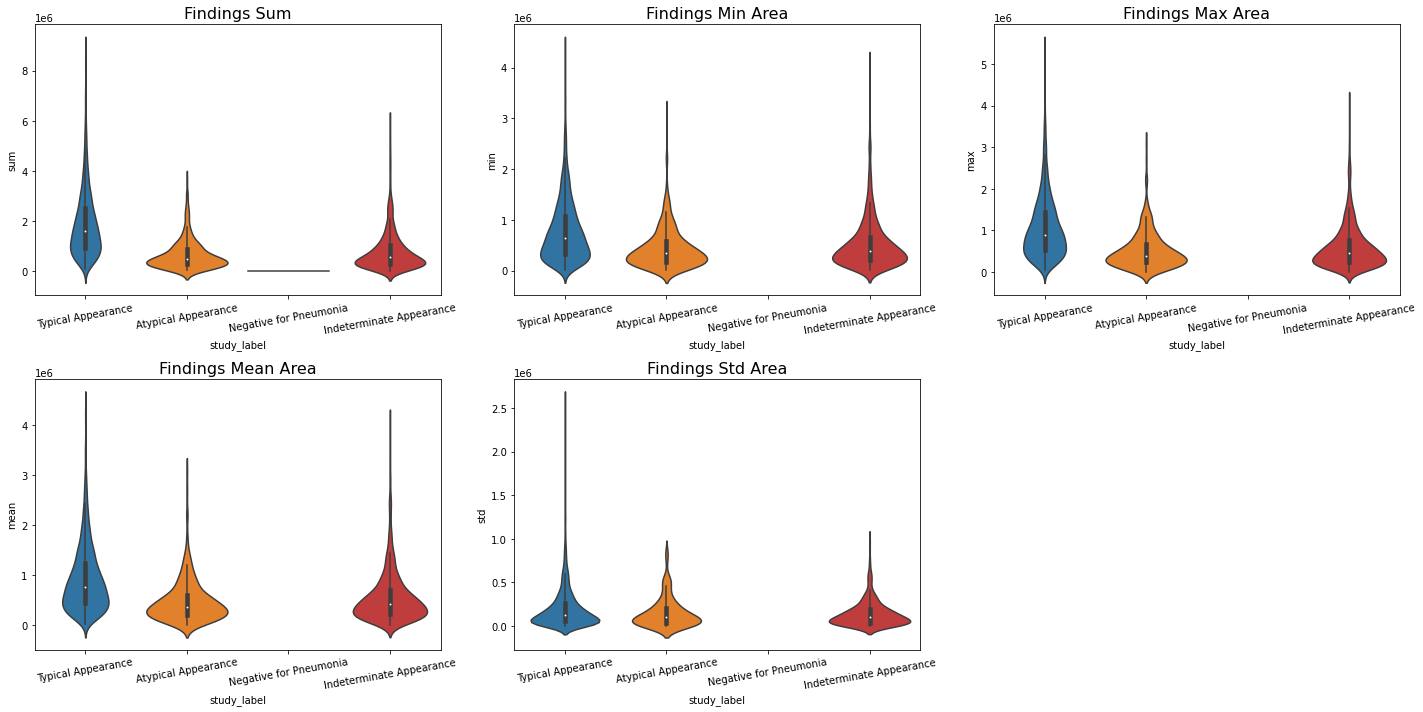

In [28]:
study_props = (image_props[['study_id']]
               .join(findings)
               .groupby('study_id').area.agg(['count','sum', 'min', 'max', 'mean', 'std'])
               .merge(study_labels, left_on='study_id', right_index=True))

plt.figure(figsize=(20,10))

for i, prop in enumerate(['sum', 'min', 'max', 'mean', 'std'], start=1):
    plt.subplot(2, 3, i)
#     plt.gca().yaxis.grid(linestyle='--')
    sns.violinplot(data=study_props, x='study_label', y=prop, order=study_labels.unique(), pallete=['blue', 'green', 'green', 'red'])
    plt.xticks(rotation=10)
    title = f'Findings {prop.title()}'
    if prop.title() != 'Sum': title += ' Area'
    plt.title(title, fontdict={'fontsize':16})
plt.tight_layout()
plt.show()

Here can't see a significant difference between the image level and study level.  
Anyway, this led us to an important question: How many images are related to one study on average, and, in case that a study had more than one image, how many images the prognosis is based on?

In [29]:
image_df.groupby('study_id').label.count().unique()

array([1, 2, 3, 9, 4, 6, 5, 7])

In [30]:
print(image_df.groupby('study_id').label.agg(images_count='count').value_counts().to_string())
# g = sns.countplot(data=image_df.groupby('study_id').label.agg(images_count='count'), x='images_count')

images_count
1               5822
2                207
3                 15
4                  4
5                  3
6                  1
7                  1
9                  1


In most of cases we have one image per study. But in those cases that have mupltiple images, what the difference between the images? is the prognosis based on all of those images? on the second qestion is easy to get  an answer from the data we saw. We just have to see how many of images are labeled with findings.

In [31]:
multiple_images = image_df.groupby('study_id').filter((lambda x: x.label.count() > 1))
multiple_images_with_findings = multiple_images[multiple_images.boxes.notna()]
print('Images with finding in Study Counts')
print(multiple_images_with_findings.groupby('study_id').boxes.agg(count='count').value_counts().to_string())

Images with finding in Study Counts
count
1        177


Ok! So for a study, we never have more than one image labaled with findings! Now it is much more interesting to see the difference between the images in onw study. For doing so, we have to turn our attention to the third and most importanr part of our dataset - the DICOM files. 

#### DICOM files
Our data is provided in [DICOM fromat](https://en.wikipedia.org/wiki/DICOM), which is the standard in medical imaging information and related data. This format packs each medical image with related data, such as Patient Id, Name, Sex, etc. Here, the data is deidentified due to privacy reasons, but we still may have important data in the metadata provided in the DICOM file.  
Let's pick some file and see what it looks like.

Dataset.file_meta -------------------------------
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113654.2.70.1.145496332694157621066101995157347089978
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: 71228e4340de
(0008, 0018) SOP Instance UID                    UI: 261e900d92b1
(0008, 0020) Study Date                          DA: 'ae56c72565cb'
(0008, 0030) Study Time                          TM: 'd9aaab8884f8'
(0008, 0050) Accession Number                    SH: '05ca9562c0a6'
(0008, 0060) Modality                            CS: 'DX'
(0010, 0010) Patient's Name                      PN: '73473ba59adf'
(0

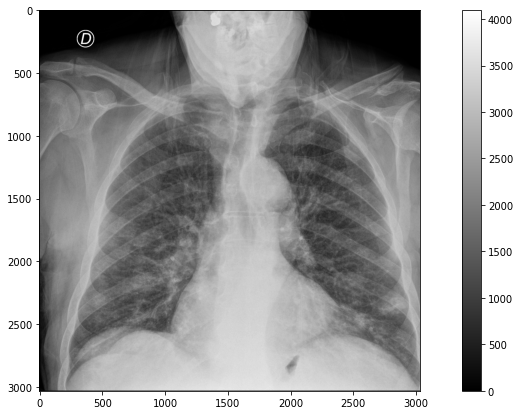

In [32]:
from pydicom import dcmread

def extract_id(full_id): return full_id[:full_id.index('_')]
def get_file_path(study_id, image_id, dataset='train'):
    study_id, image_id = extract_id(study_id), extract_id(image_id)
    return [*(path/dataset/study_id).glob(f'**/{image_id}.dcm')][0] 

#     return [*(path/dataset/row.study_id.str.extract("(^[^_]*)").values[0,0]).glob(f'**/{row.index.str.extract("(^[^_]*)").values[0,0]}.dcm')][0] 
sample = image_df.sample(random_state=14)
fpath = get_file_path(sample.study_id.values[0], sample.index.values[0])
ds = dcmread(fpath)

print(ds)
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.colorbar()
plt.show()

Let's take a taste from our data:

In [65]:
# import gdcm
def show_dicoms(df, ncols=5, size=5, annotate=False):
    n = df.shape[0]
    nrows = int(np.ceil(n/ncols))

    fig = plt.figure(figsize=(size*ncols, size*nrows))
    for i, row in enumerate(df.itertuples()):
        fpath = get_file_path(row.study_id, row.Index)
        ds = dcmread(fpath)
        plt.subplot(nrows, ncols,i+1)
        plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
        if annotate:
            if isinstance(row.boxes, str):
                for box in literal_eval(row.boxes):
                    rect = patches.Rectangle((box['x'], box['y']), 
                                             box['width'], box['height'],
                                            color='r', fill=False)
                    plt.gca().add_patch(rect)
        plt.xticks([]), plt.yticks([])
    plt.subplots_adjust()
    return fig
#     plt.show()

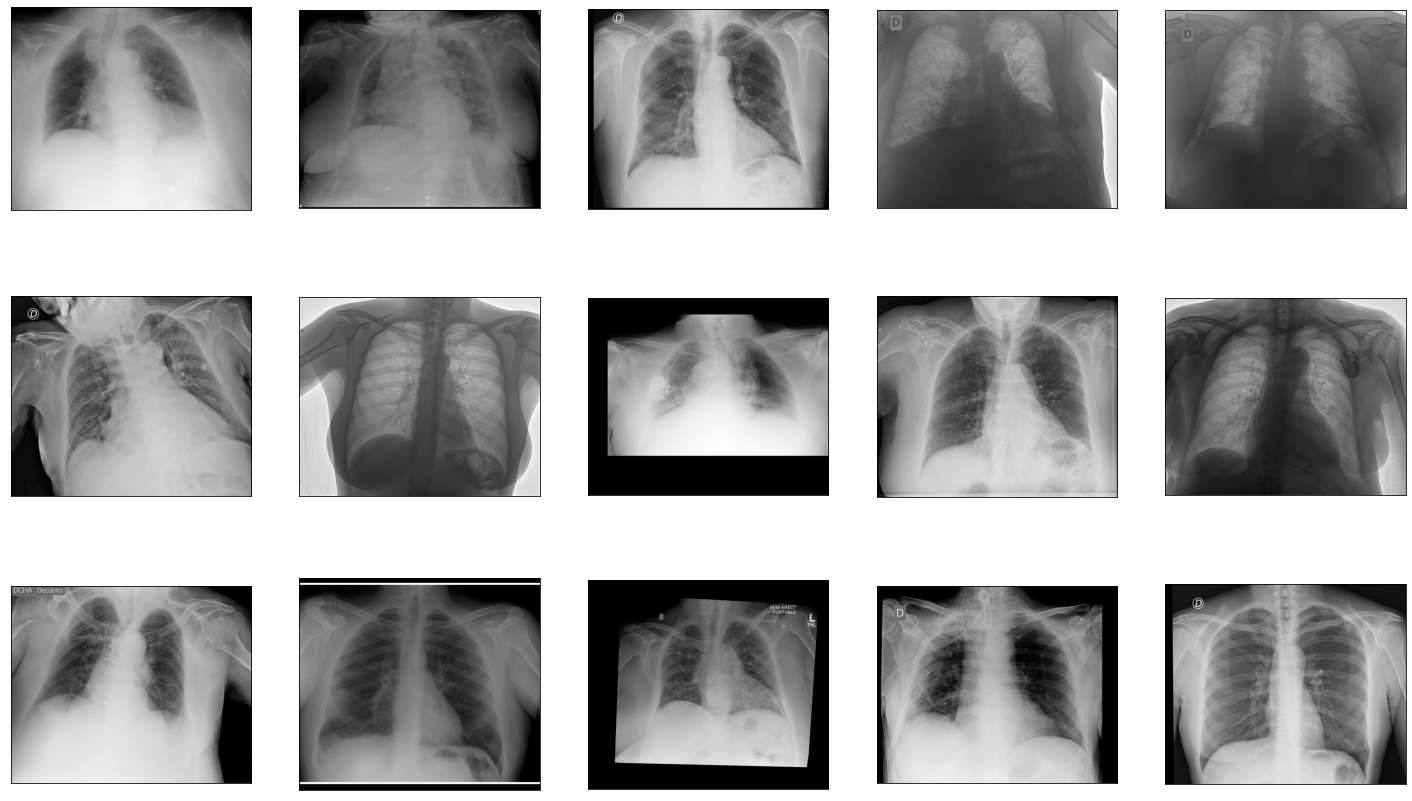

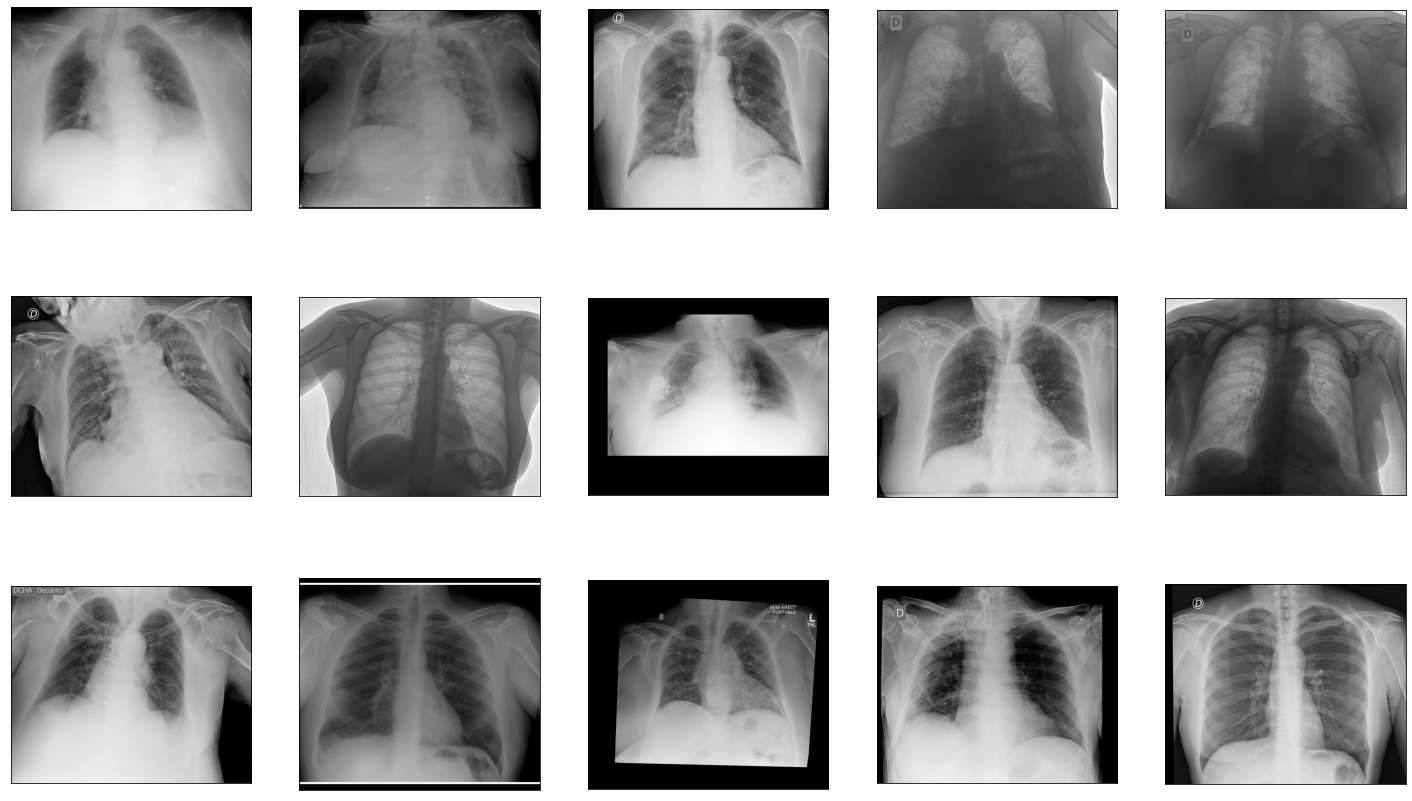

In [54]:
show_dicoms(image_df.sample(15, random_state=25))

It can be seen that many of the images are cropped, rotated, and have different lummination level, Lungs are contained in all of the images, but place of the lungs in the image is not constant, The images margin size are varying, and the images contains somtines other body parts -  neck, stomach, hands, etc.
To get a better understading of what going on, it will be helpful to see CXR from the different labels with the anotated bounding boxes drawn on the image.

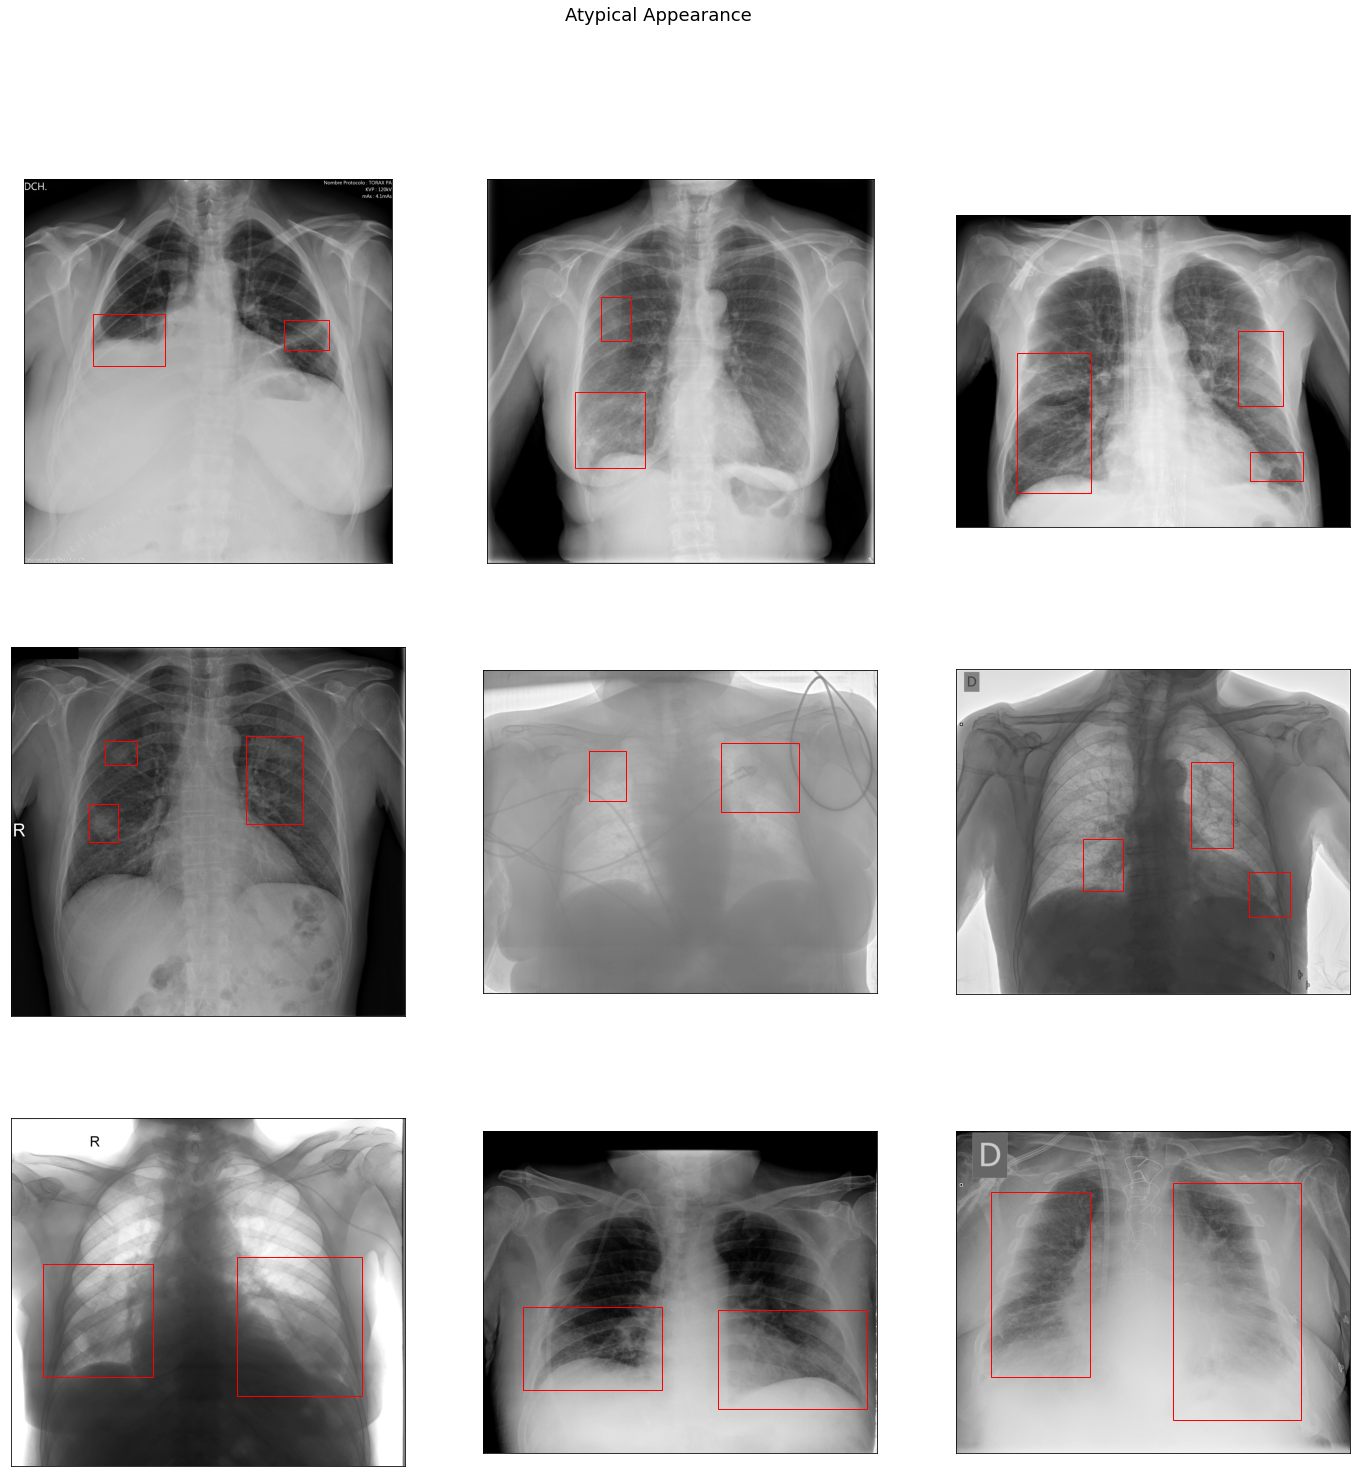

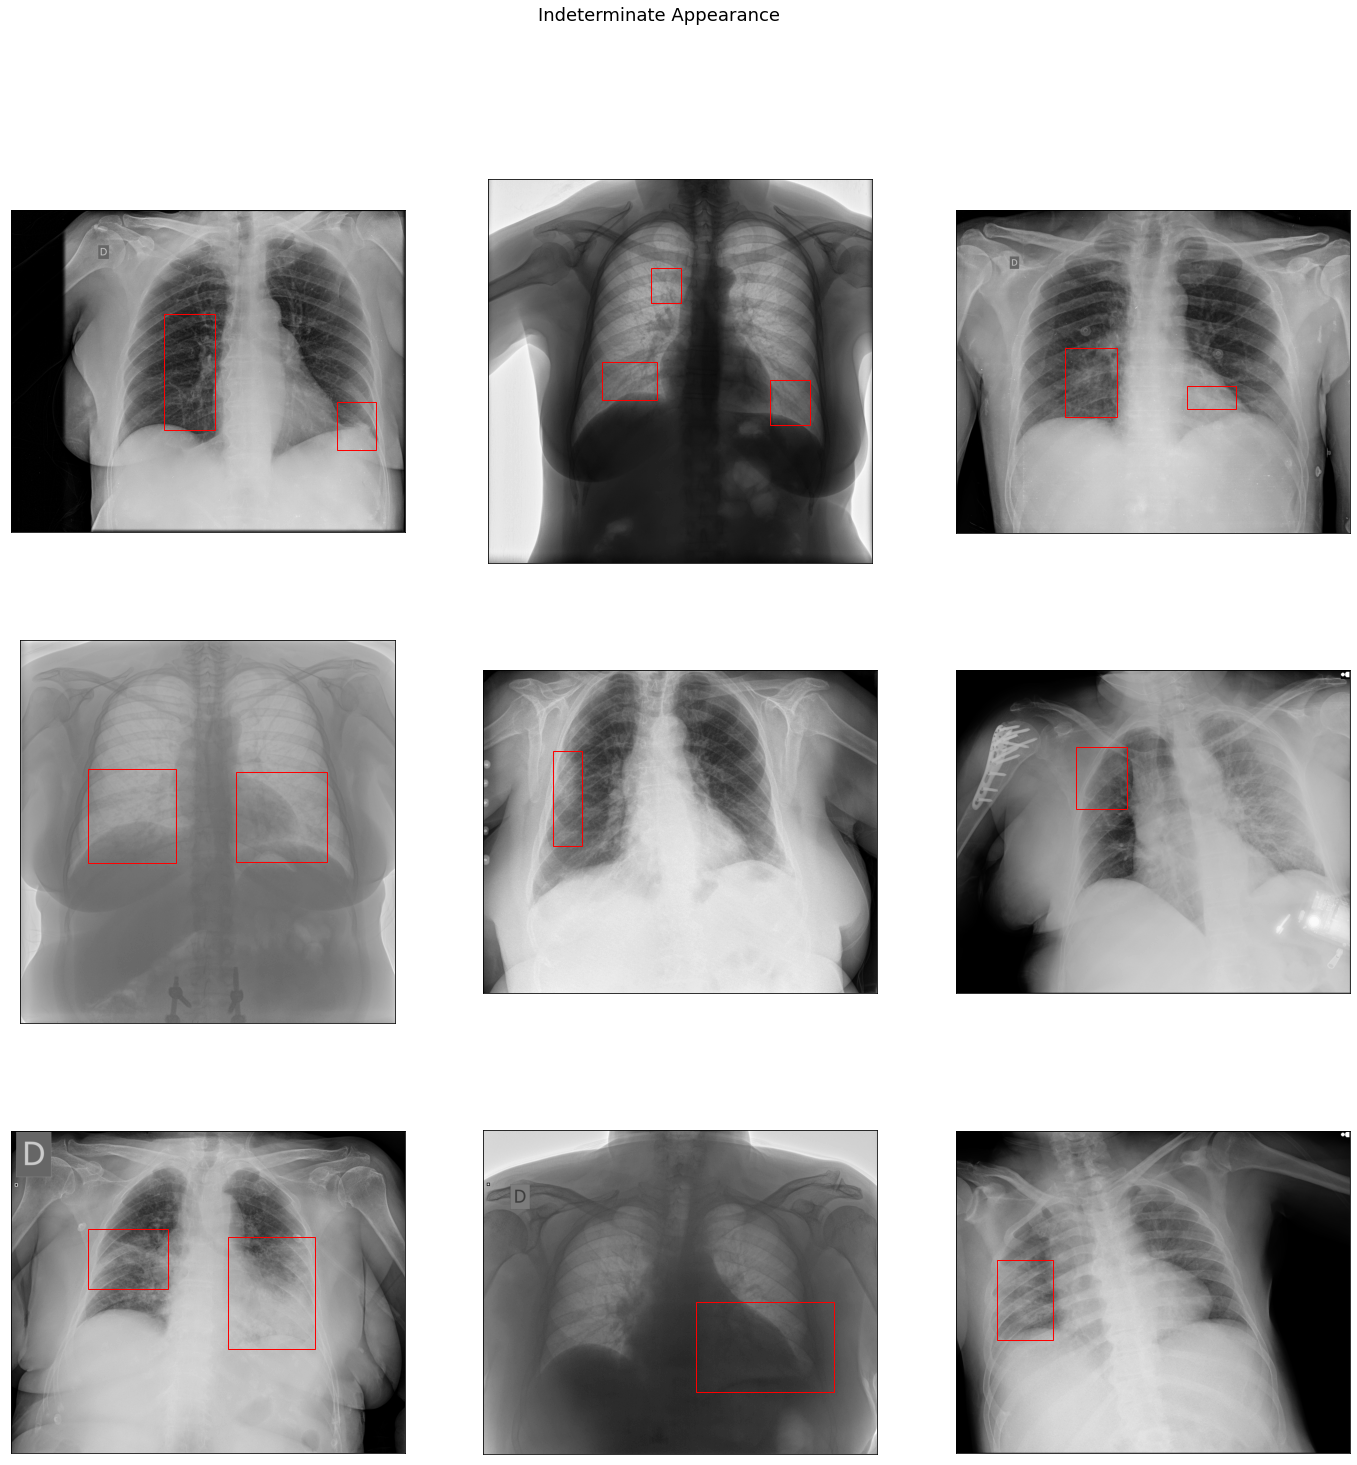

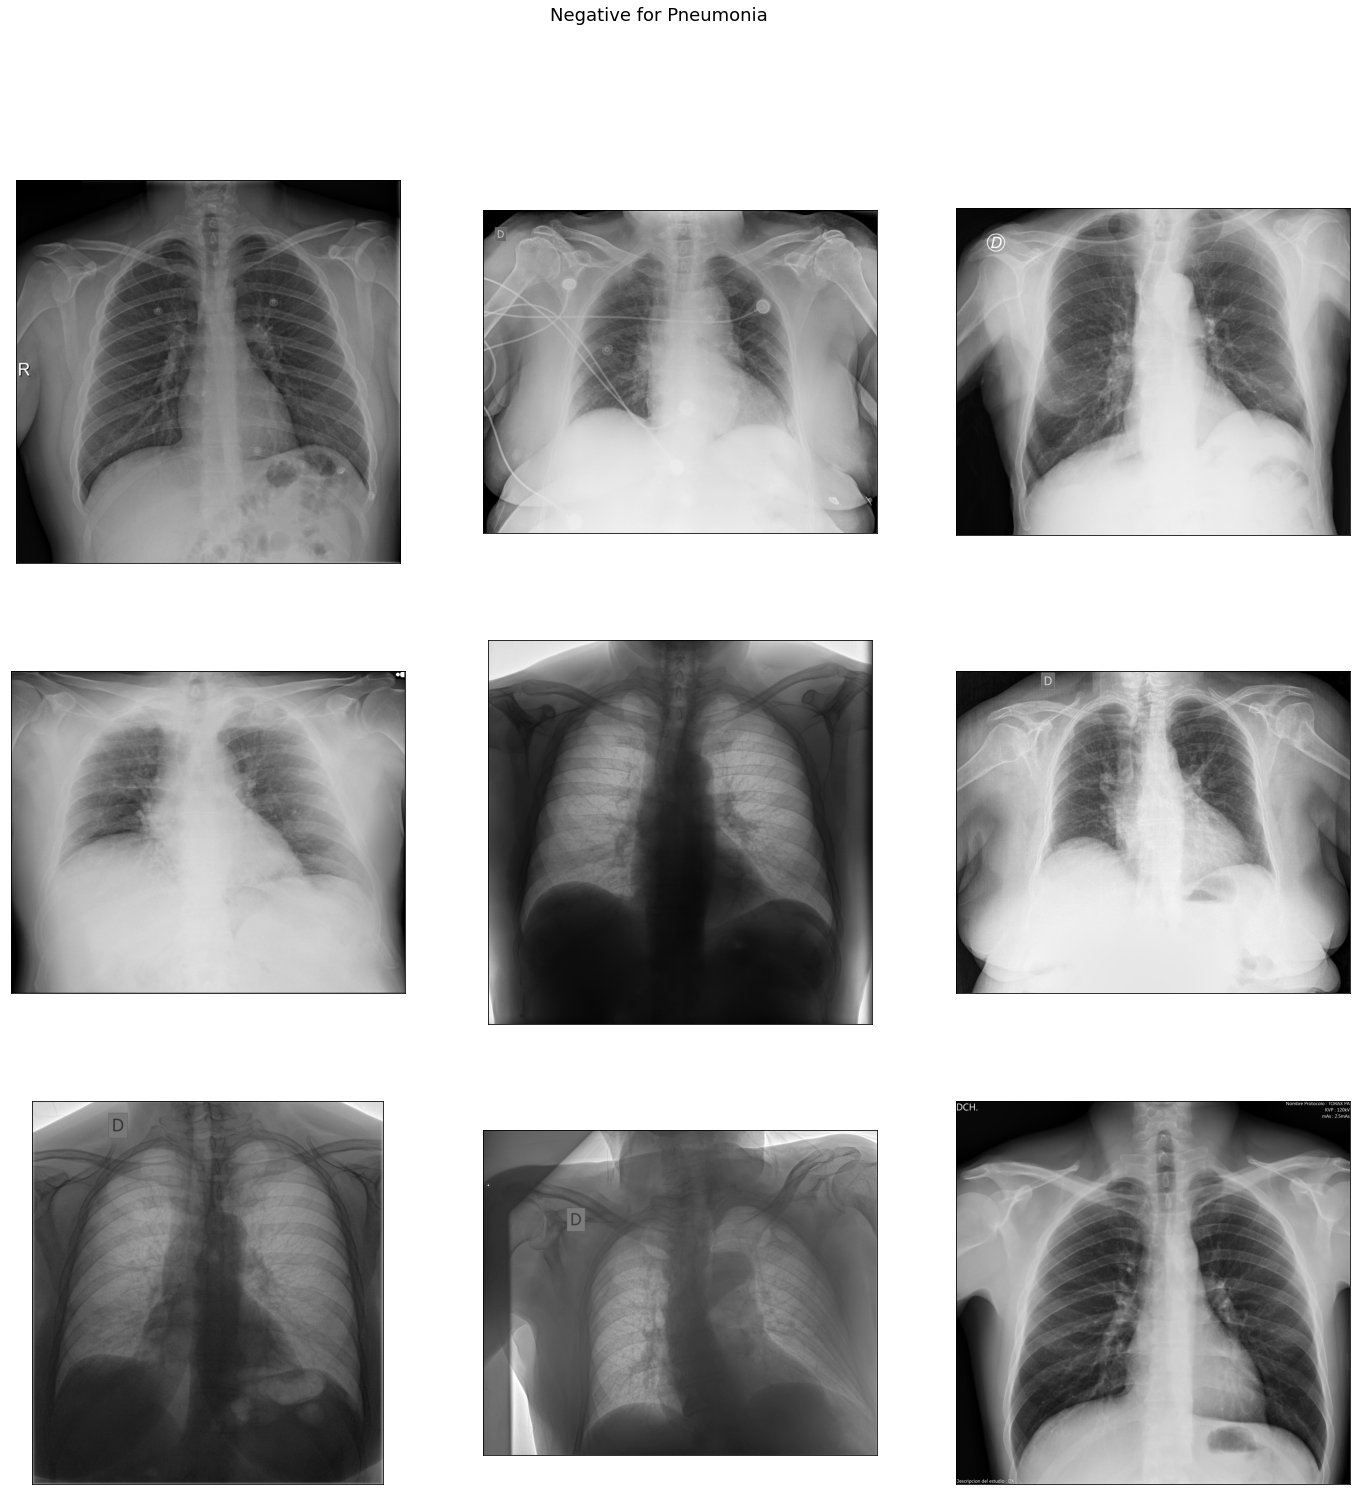

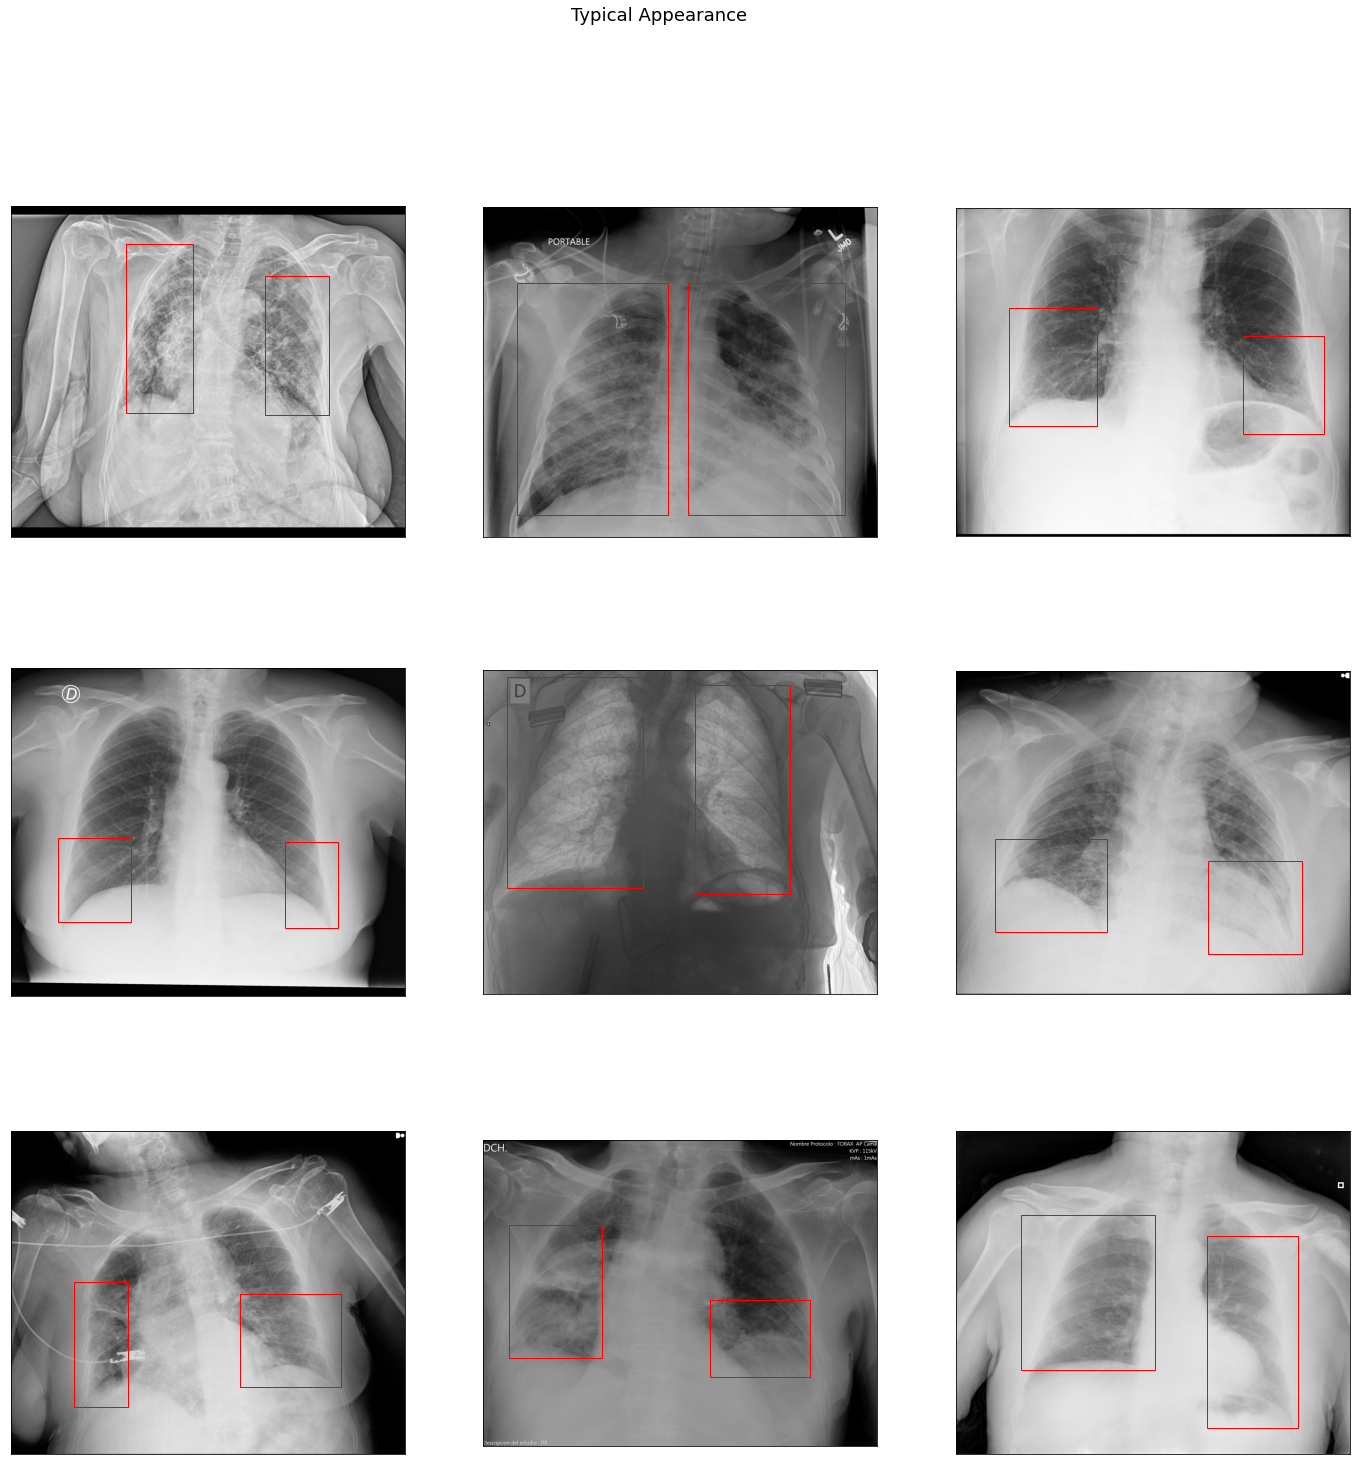

In [68]:
gb = image_df.groupby('study_label')
for name, group in gb:
    if not name.startswith('Neg'): group = group.loc[group.boxes.notna()]
    fig = show_dicoms(group.sample(9, random_state=4), 3, 8, annotate=True)
    fig.suptitle(name, fontsize=18)
    plt.show()

The most certain thing I can say about this plots is that I don't know. Although sometimes I can see a kind of opacity in the boxes, in other cases I cannot tell the difference between the area inside the box and the area outside.

Now let's take a look at the metadata provided by the DICOMs.
The attributes that may be of interest to us are the body part examined, sex, image size, pixel spacing (represent the physical size of the image), modality (the scanning method), and image type. let's extract these features to a pandas dataframe for later use.

In [ ]:
from tqdm.notebook import tqdm
data = {}
def append_dcm_properties(row, props):
#     print(row)
    try:
        fpath = get_file_path(row.study_id, row.Index)
#         fpath = [*(path/'train'/row.study_id[:row.study_id.index("_")]).glob(f'**/{row.Index[:row.Index.index("_")]}.dcm')][0] 
        ds = dcmread(fpath)
        data[row.Index] = {prop: getattr(ds, prop.replace(' ', '')) for prop in props}
    except Exception as e:
        print(f'**/{row.name[:row.name.index("_")]}.dcm')
        raise
        
props = ['Image Type', 'Modality','Body Part Examined', 
                                       'Patient Sex', 'Imager Pixel Spacing', 'Rows', 'Columns']
# image_df.apply(lambda x: append_dcm_properties(x, props) , axis=1)
for row in tqdm(image_df.itertuples(), total=image_df.shape[0]):
    append_dcm_properties(row, props)

In [ ]:
DICOM_metadata = pd.DataFrame.from_dict(data, orient='index')

In [ ]:
DICOM_metadata.to_csv('DICOM_metadata.csv')

In [73]:
dm = pd.read_csv('/kaggle/input/siim-covid19-detection-dicom-metadata/DICOM_metadata.csv', index_col=0)
dm.head()

Image Type  \
000a312787f2_image                            ['ORIGINAL', 'PRIMARY']   
000c3a3f293f_image                            ['ORIGINAL', 'PRIMARY']   
0012ff7358bc_image                             ['DERIVED', 'PRIMARY']   
001398f4ff4f_image  ['DERIVED', 'PRIMARY', 'POST_PROCESSED', 'RT',...   
001bd15d1891_image                            ['ORIGINAL', 'PRIMARY']   

                   Modality Body Part Examined Patient Sex  \
000a312787f2_image       DX              CHEST           M   
000c3a3f293f_image       CR              CHEST           M   
0012ff7358bc_image       DX         PORT CHEST           F   
001398f4ff4f_image       CR              CHEST           F   
001bd15d1891_image       DX              CHEST           M   

                   Imager Pixel Spacing  Rows  Columns  
000a312787f2_image           [0.1, 0.1]  3488     4256  
000c3a3f293f_image         [0.15, 0.15]  2320     2832  
0012ff7358bc_image       [0.139, 0.139]  2544     3056  
001398f4ff4f_image           [0.1, 0.1]  3520     4280  
001bd15d1891_image       [0.125, 0.125]  2800     3408

Let's inspect the value ranges of our new data:

In [75]:
for column in dm[:]:
    print(f'{column}:' )
    print(dm[column].unique())
    print('-'*100)

Image Type:
["['ORIGINAL', 'PRIMARY']" "['DERIVED', 'PRIMARY']"
 "['DERIVED', 'PRIMARY', 'POST_PROCESSED', 'RT', '', '', '', '', '100000']"
 "['DERIVED', 'SECONDARY', '', 'CSA RESAMPLED']"
 "['ORIGINAL', 'SECONDARY']" "['ORIGINAL', 'PRIMARY', '']" 'ORIGINAL'
 "['DERIVED', 'PRIMARY', '']"
 "['ORIGINAL', 'SECONDARY', 'ORIGINAL', 'PRIMARY', '']"
 "['ORIGINAL', 'PRIMARY', '', 'RAD']"
 "['DERIVED', 'PRIMARY', 'POST_PROCESSED', 'RT', '', '', '', '', '150000']"
 "['DERIVED', 'PRIMARY', 'POST_PROCESSED', '', 'RENORMALIZED', '20200405215415', '', '', '100000']"
 "['DERIVED', 'PRIMARY', 'POST_PROCESSED', '', '', '', '', '', '100000']"
 "['DERIVED', 'PRIMARY', 'POST_PROCESSED', '', 'RENORMALIZED', '20200405214833', '', '', '100000']"
 'DERIVED']
----------------------------------------------------------------------------------------------------
Modality:
['DX' 'CR']
----------------------------------------------------------------------------------------------------
Body Part Examined:
['CHEST' 'P

The first thing to inspect is the sex field.  
How our data splitted between the sexes? How the sex is related with the COVID19 prognoses?

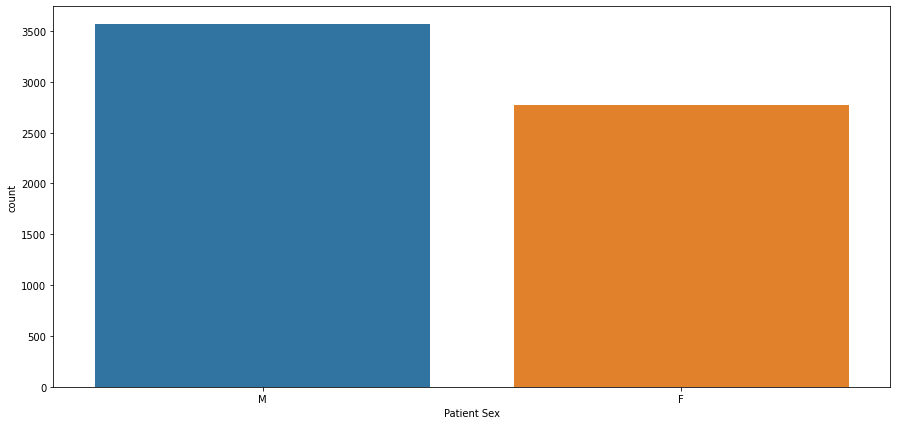

In [77]:
sns.countplot(data=dm, x='Patient Sex');

<AxesSubplot:xlabel='study_label', ylabel='count'>

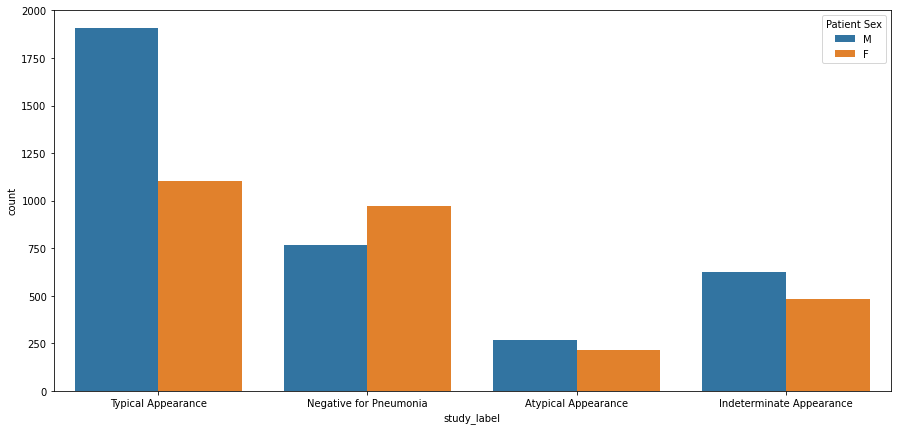

In [78]:
plt.figure(figsize=(15,7))
sns.countplot(data=dm.join(image_df), x='study_label', hue='Patient Sex')

We can see here the well-known fact (which I also know from my immediate surroundings) that generally women tend much less to suffering from Covid-19. Although our data is quite balanced with respect to sexes, women in general much less suffer from pneumonia of any kind, and in the typical to covid cases (clear/severe covid cases) we have about two-thirds cases of women the men. 

In `Body Part Examined` column, we have the unique values
>`'CHEST' 'PORT CHEST' 'TORAX' nan 'T?RAX' 'Pecho' 'THORAX' 'ABDOMEN'
 'SKULL' '2- TORAX' 'TÒRAX' 'PECHO'`
 
 'CHEST', 'THORAX' (which we have in many versions), and 'PECHO' are all the same, whether you prefer English or Spanish. Let's try to see what are the other things we have here (Why we have `SKULL`s here???)

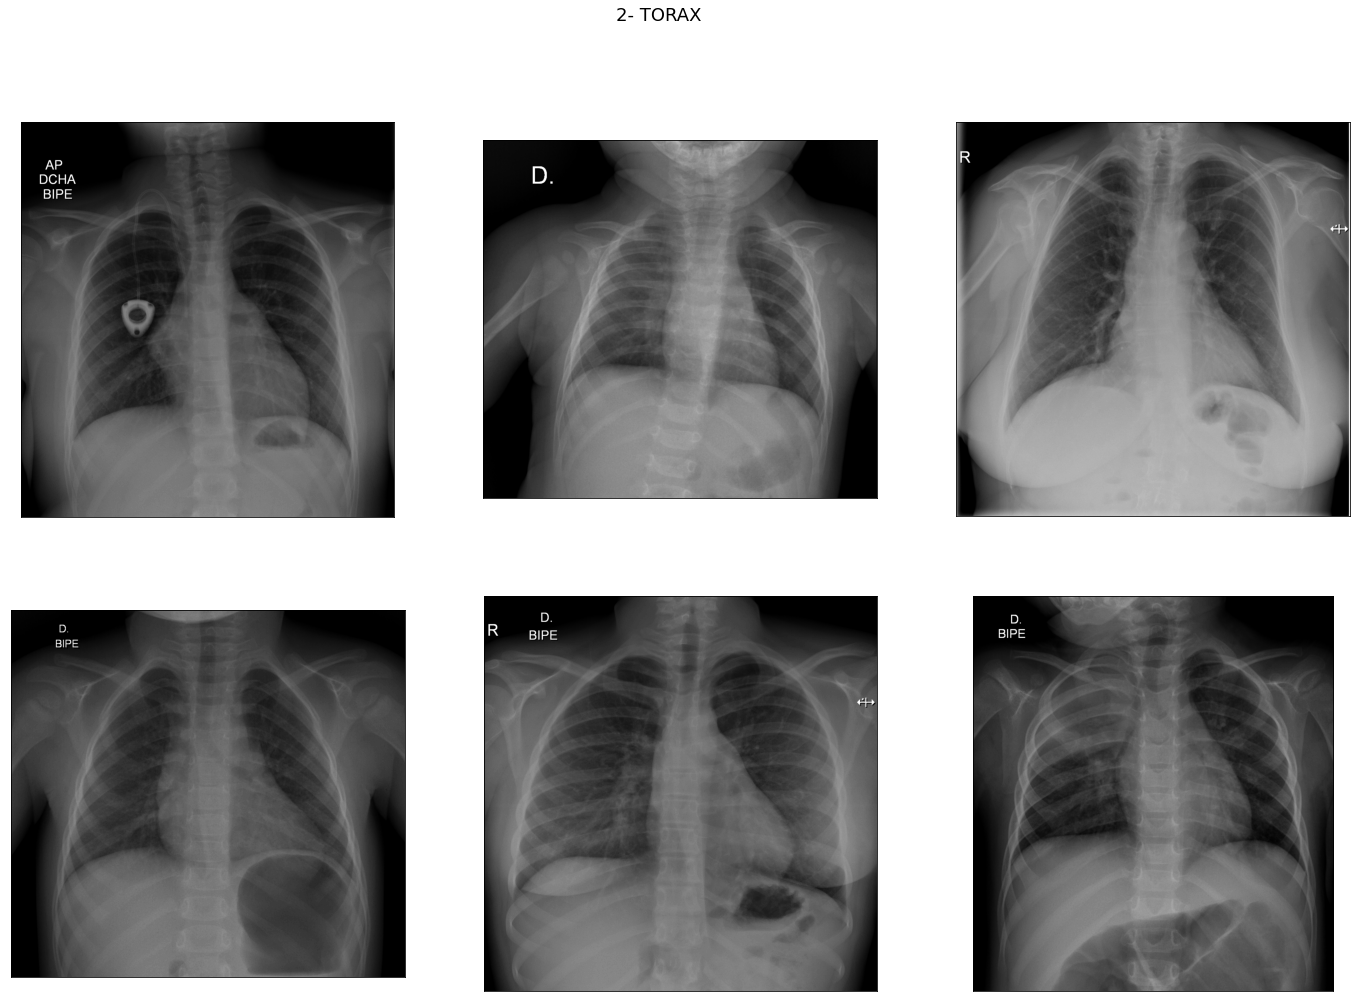

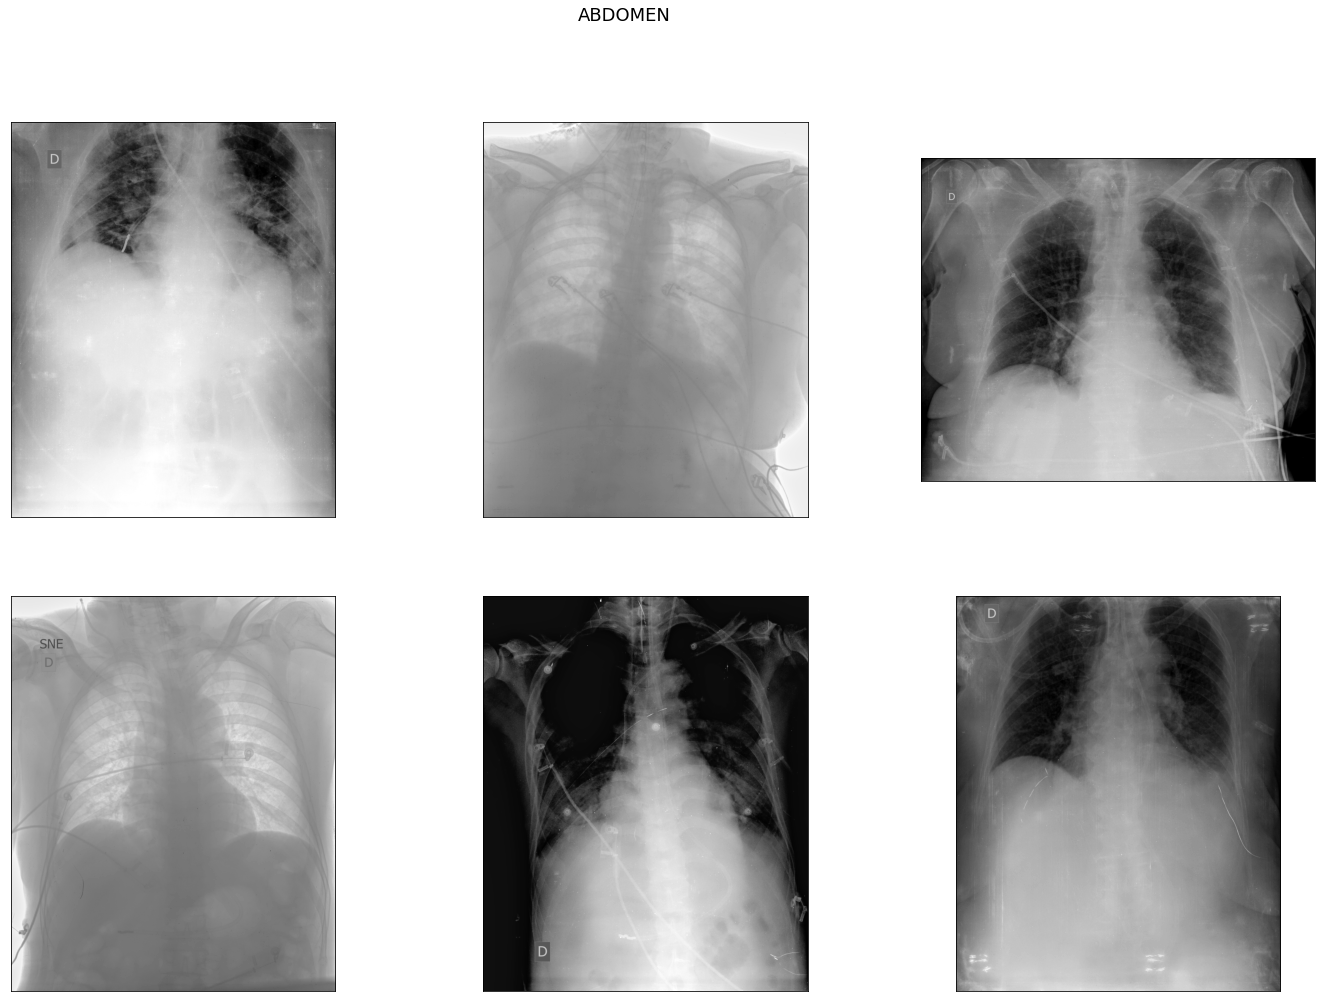

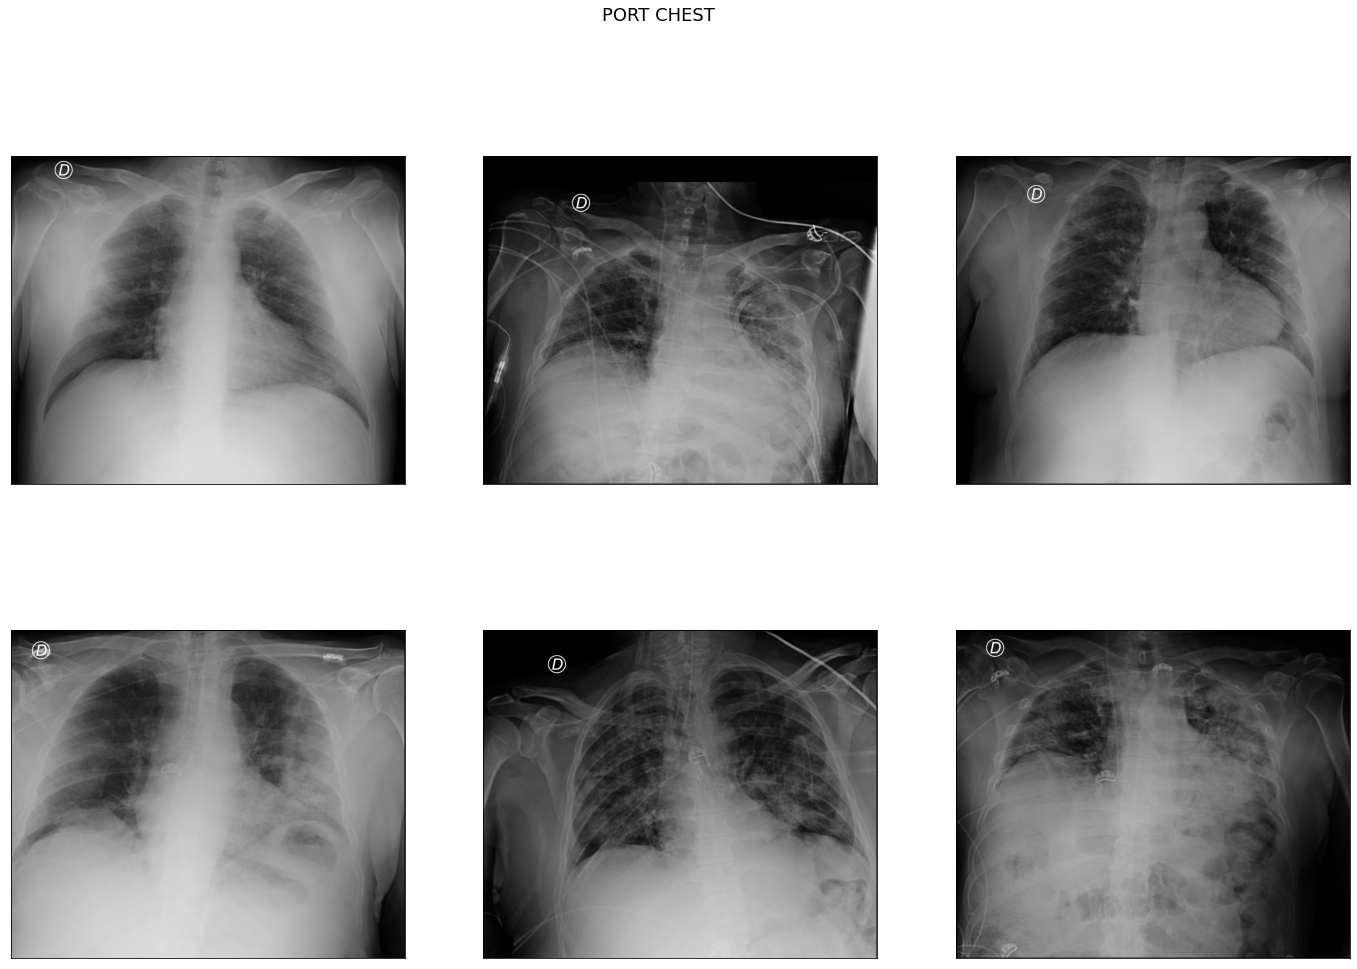

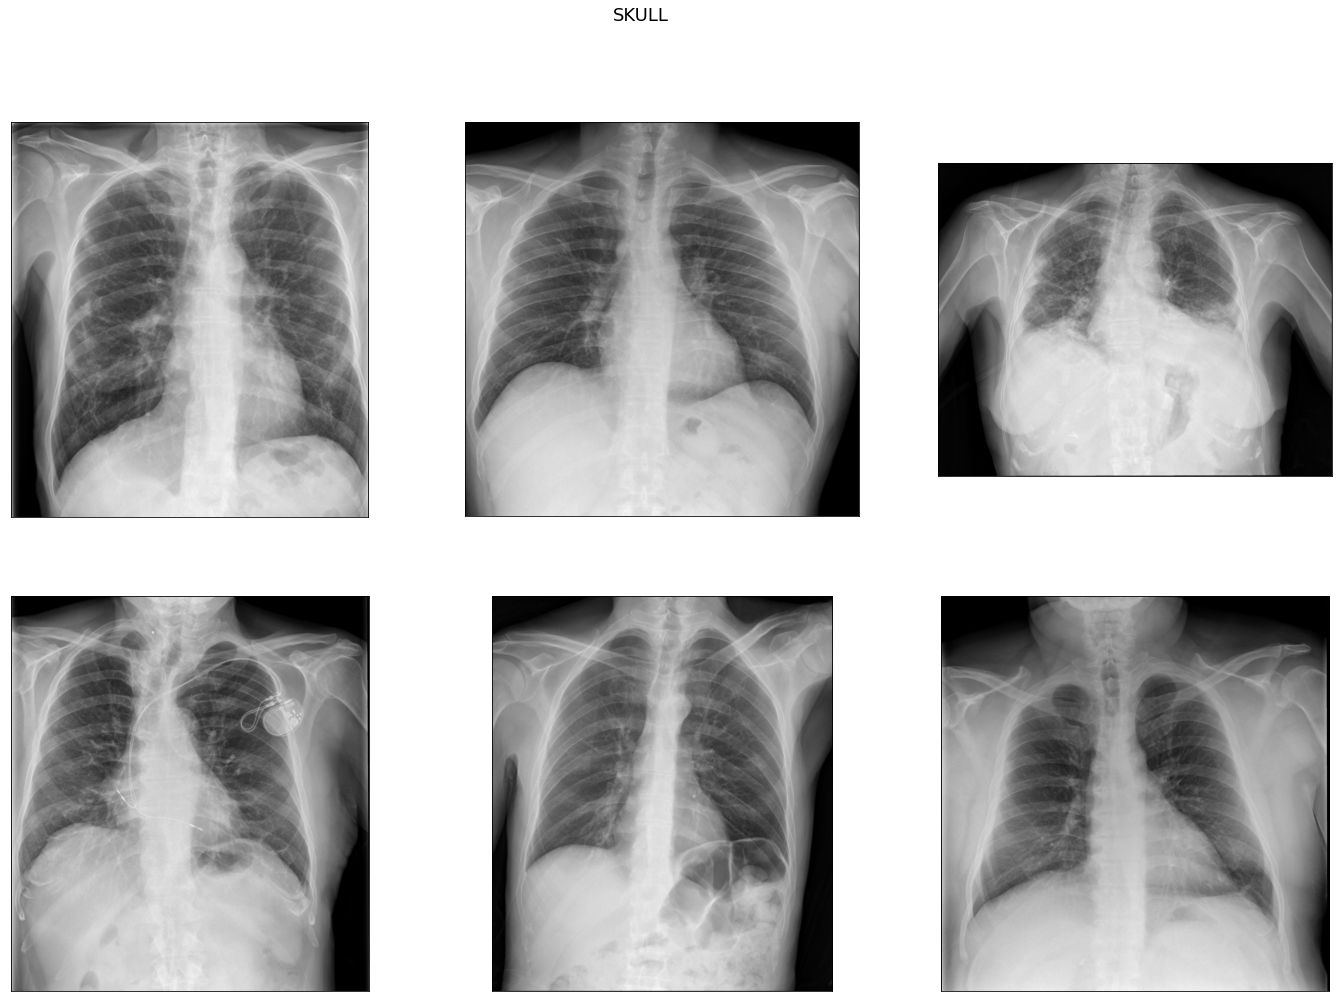

In [86]:
body_parts = dm.loc[~dm['Body Part Examined'].isin(['CHEST', 'TORAX','THORAX', 'T?RAX',
                                                     'TÒRAX','PECHO', 'Pecho'])]
gb = body_parts.join(image_df).groupby('Body Part Examined')
for name, group in gb:
    fig = show_dicoms(group.sample(6, random_state=4), 3, 8)
    fig.suptitle(name, fontsize=18)
    plt.show()

The `ABDOMEN` images seems to contains the body's lower part too. Beside that. it's not seems to e a significant difference between the images group (in particuar, we have no `SKULL`s here).

# Next Steps